## perplexity by temperature: GPT-4o and 'Does the electoral college work?'

In [1]:
import importlib
import utils.perplexity
importlib.reload(utils.perplexity)
from utils.perplexity import *

In [2]:
import importlib
import utils.qualitymetrics
importlib.reload(utils.qualitymetrics)
from utils.qualitymetrics import *
from utils.quality_evauluator import EssayEvaluator

calculate perplexity statistics for each of the essays. save them into json files. 

In [3]:
gptdf = pd.read_pickle('./data/elect_gpt4o_evaldf.pkl')
gptdf.shape

(51, 26)

In [4]:
from tqdm import tqdm

In [5]:
# Load model 
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("google/gemma-2-2b")
model = AutoModelForCausalLM.from_pretrained("google/gemma-2-2b",                                          
    #load_in_8bit=True,
    device_map='auto')

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Some parameters are on the meta device because they were offloaded to the disk and cpu.


In [ ]:
# Load model 
#from transformers import AutoTokenizer, AutoModelForCausalLM
#model_name = "distilgpt2"
#tokenizer = AutoTokenizer.from_pretrained(model_name)
#model = AutoModelForCausalLM.from_pretrained(model_name)

In [6]:
import importlib
import utils.perplexity
importlib.reload(utils.perplexity)
from utils.perplexity import *

sample_text = "The quick brown fox jumps over the lazy dog and went on to beat the bejesus out of Cthulhu."
logits, tokens, input_ids, loss = get_eval_results(
    text= sample_text, 
    model = model, 
    tokenizer = tokenizer)
statsdf = get_sequential_predictions_statsdf(logits, tokens, input_ids, tokenizer)

In [7]:
showcols = ["tokens",
    "next_token",
    "perplexity", 
    "next_token_probs",
    "next_token_rank",
    "most_probable_next_token",
    "most_probable_next_token_prob",
    "logit_mean",
    "actual_next_token_logit_z_scores",
    "actual_next_token_prob_z_scores",
    ]

In [8]:
statsdf

,tokens,input_id,next_token,next_input_id,next_token_probs,next_token_rank,actual_next_token_logits,actual_next_token_logit_z_scores,actual_next_token_probs,actual_next_token_prob_z_scores,most_probable_next_token_id,most_probable_next_token_prob,most_probable_next_token,logit_mean,logit_std,prob_mean,prob_std,perplexity
0,The,2,▁quick,651,0.070303,2,2.268036,8.34513,0.070303,165.447952,185,0.135568,<h1>,-16.469664,2.245345,0.000004,0.000425,14.224168
1,▁quick,651,▁brown,4320,0.000003,2280,18.394413,2.472825,0.000003,-0.002084,235248,0.236733,▁,1.148534,6.974163,0.000004,0.000511,2237.105472
2,▁brown,4320,▁fox,8426,0.005484,21,23.044495,3.977599,0.005484,8.518239,3448,0.224755,▁answer,-2.620778,6.452453,0.000004,0.000643,969.992584
3,▁fox,8426,▁jumps,25341,0.955542,0,19.810137,6.531828,0.955542,505.896423,25341,0.955542,▁fox,-6.15903,3.975789,0.000004,0.001889,175.797992
4,▁jumps,25341,▁over,36271,0.717949,0,20.4596,6.352698,0.717949,484.971649,36271,0.717949,▁jumps,-5.386352,4.0685,0.000004,0.00148,66.802445
5,▁over,36271,▁the,1163,0.971829,0,19.962795,7.099749,0.971829,505.944427,1163,0.971829,▁over,-5.086016,3.528126,0.000004,0.001921,33.321818
6,▁the,1163,▁lazy,573,0.929822,0,10.765461,8.489282,0.929822,505.251129,573,0.929822,▁the,-11.871955,2.666588,0.000004,0.00184,20.403767
7,▁lazy,573,▁dog,27894,0.986559,0,16.99008,7.285389,0.986559,505.959717,27894,0.986559,▁lazy,-9.124,3.584445,0.000004,0.00195,14.019456
8,▁dog,27894,▁and,5929,0.963413,0,10.695178,7.701482,0.963413,505.919403,5929,0.963413,▁dog,-12.068545,2.955759,0.000004,0.001904,10.498208
9,▁and,5929,▁went,578,0.008722,7,24.535645,4.741509,0.008722,7.030899,235265,0.614037,.,3.788169,4.375711,0.000004,0.00124,13.333458


In [9]:
import re
def clean_text(text):
    # Remove all characters that are not alphanumeric, punctuation, or spaces
    return re.sub(r"[^a-zA-Z0-9\s.,!?;:(){}\[\]<>\"'@#$%^&*_+=|\\/-]", "", text)

In [ ]:

from tqdm import tqdm

gptevaldf = pd.read_pickle("data/elect_gpt4o_evaldf.pkl")
for i, text in tqdm(enumerate(gptevaldf.iloc[7:].text)):
    text = clean_text(text)
    logits, tokens, input_ids, loss = get_eval_results(
        text= text, 
        model = model, 
        tokenizer = tokenizer)
    statsdf = get_sequential_predictions_statsdf(logits, tokens, input_ids, tokenizer)
    filename = f'./data/elect_gpt4o_stats_gemma22b/{gptevaldf.index[i]}.json'
    statsdf.to_json(filename, orient='records', lines=True)

0it [00:00, ?it/s]

In [ ]:

sample_size = 10
gptevaldf = pd.read_pickle("data/elect_evaldf.pkl")
for i, text in enumerate(gptevaldf.text.iloc[:sample_size]):
    logits, tokens, input_ids, loss = get_eval_results(
        text= clean_text(text),
        model = model, 
        tokenizer = tokenizer)
    statsdf = get_sequential_predictions_statsdf(logits, tokens, input_ids, tokenizer)
    filename = f'./data/elect_stats_gemma22b/{gptevaldf.index[i]}.json'
    statsdf.to_json(filename, orient='records', lines=True)


In [ ]:
i = 
statsdf = pd.read_json(f'./data/elect_stats/{i}.json', lines=True)
statsdf[showcols].head(100)

,tokens,next_token,perplexity,next_token_probs,next_token_rank,most_probable_next_token,most_probable_next_token_prob,logit_mean,actual_next_token_logit_z_scores,actual_next_token_prob_z_scores
0,ĠDear,Ġ[,1563.075481,0.000640,182,ĠThe,0.062094,-40.725048,2.741078,1.765795
1,Ġ[,State,2920.598932,0.000183,809,Ġedit,0.090292,-57.680923,2.350464,0.366608
2,State,ĠSenator,1166.504351,0.005374,12,Ġof,0.295790,-46.252983,4.218310,3.396058
3,ĠSenator,'s,707.806085,0.006324,10,],0.342601,-63.345848,4.009326,4.080620
4,'s,ĠName,478.787094,0.009976,11,],0.205644,-58.778385,3.776296,9.129510
...,...,...,...,...,...,...,...,...,...,...
95,Ġinfluence,Ġof,14.455724,0.956884,0,Ġof,0.956884,24.657389,6.618192,224.105972
96,Ġof,Ġlarge,14.663284,0.017354,4,Ġthe,0.349632,-76.840393,3.460819,10.409491
97,Ġlarge,Ġstates,14.938555,0.011020,15,Ġand,0.160545,-74.185593,3.602401,10.493215
98,Ġstates,Ġ(,15.261508,0.008056,12,Ġand,0.249222,-73.669647,4.419704,5.078521


In [ ]:
import pandas as pd
import glob
import numpy as np
import os

# Get the list of the first 10 JSON files
json_files = glob.glob('./data/elect_gpt4o_stats_llama2/*.json')

# Read each JSON file into a dataframe and concatenate them
df_list = [pd.read_json(file, orient='records', lines=True) for file in json_files]

# Combine the dataframes into a single dataframe
combined_df = pd.DataFrame([df.to_dict(orient='list') for df in df_list])

In [125]:
gptdf = gptdf.join(combined_df)

In [ ]:
gptdf.to_pickle('./data/elect_gpt4o_evaldf_llama2_withstats.pkl')

plot statistics: how does temperature effect the perception of text by the judge which is gpt4omini? 

In [127]:
gptdf['wc_of_perceived_ai_text'] = gptdf['substrings_of_high_likelihood_of_ai'].apply(lambda l: np.sum([len(x.split()) for x in l]))
gptdf['number_of_perceived_ai_text'] = gptdf['substrings_of_high_likelihood_of_ai'].apply(lambda l: len(l))

correlation shows nothing exciting except for engagement score, maybe. 

In [131]:
from scipy.stats import pearsonr

for key in int_evaluation_keys + ordinal_evaluation_keys:
    correlation, p_value = pearsonr(gptdf['temperature'], gptdf[key])
    print(f'Correlation between temperature and {key}: {correlation:.4f}, p-value: {p_value:.4f}')

Correlation between temperature and number_of_spelling_mistakes: -0.0865, p-value: 0.5463
Correlation between temperature and number_of_grammatical_errors: -0.0523, p-value: 0.7153
Correlation between temperature and wc_of_perceived_ai_text: -0.0155, p-value: 0.9139
Correlation between temperature and number_of_perceived_ai_text: -0.0303, p-value: 0.8331
Correlation between temperature and sentence_complexity: 0.1144, p-value: 0.4243
Correlation between temperature and lexical_diversity: -0.0220, p-value: 0.8780
Correlation between temperature and vocabulary_sophistication: 0.1672, p-value: 0.2410
Correlation between temperature and coherence_score: 0.0092, p-value: 0.9491
Correlation between temperature and cohesion_score: -0.1333, p-value: 0.3509
Correlation between temperature and argument_structure: 0.1685, p-value: 0.2373
Correlation between temperature and readability_index: -0.0659, p-value: 0.6457
Correlation between temperature and sentence_clarity: 0.0149, p-value: 0.9175
Cor

# now plot perplexity and other statistics, overlapped, with temperature as hue. 

In [132]:
gptdf.columns

Index(['temperature', 'text', 'word_count', 'source', 'model',
       'number_of_grammatical_errors', 'number_of_spelling_mistakes',
       'grammatical_errors', 'spelling_mistakes', 'sentence_complexity',
       'lexical_diversity', 'vocabulary_sophistication', 'coherence_score',
       'cohesion_score', 'argument_structure', 'readability_index',
       'sentence_clarity', 'engagement_score', 'sentiment_alignment',
       'style_consistency', 'relevance_score', 'evidence_support',
       'originality_and_creativity', 'likelihood_of_ai',
       'reasoning_of_likelihood_of_ai', 'substrings_of_high_likelihood_of_ai',
       'tokens', 'input_id', 'next_token', 'next_input_id', 'next_token_probs',
       'next_token_rank', 'actual_next_token_logits',
       'actual_next_token_logit_z_scores', 'actual_next_token_probs',
       'actual_next_token_prob_z_scores', 'most_probable_next_token_id',
       'most_probable_next_token_prob', 'most_probable_next_token',
       'logit_mean', 'logit_std'

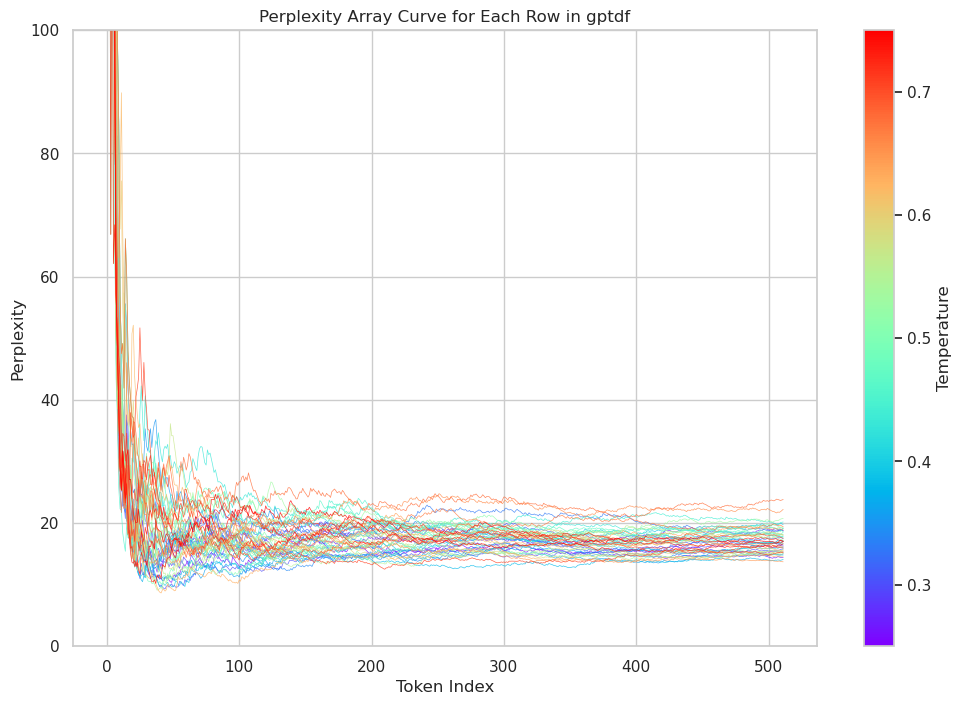

In [134]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Normalize the temperature for color mapping
norm = plt.Normalize(gptdf['temperature'].min(), gptdf['temperature'].max())
sm = plt.cm.ScalarMappable(cmap="rainbow", norm=norm)
sm.set_array([])

# Plot each row's perplexity array with temperature as hue
for i, row in gptdf.iterrows():
    perplexity_array = row['perplexity']
    temperature = row['temperature']
    ax.plot(perplexity_array, color=sm.to_rgba(temperature), label=f'Temp: {temperature:.2f}', alpha=0.8, linewidth=0.5)

# Add color bar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Temperature')

# Set y axis scale
ax.set_ylim(0, 100)

# Set labels and title
ax.set_xlabel('Token Index')
ax.set_ylabel('Perplexity')
ax.set_title('Perplexity Array Curve for Each Row in gptdf')

plt.show()

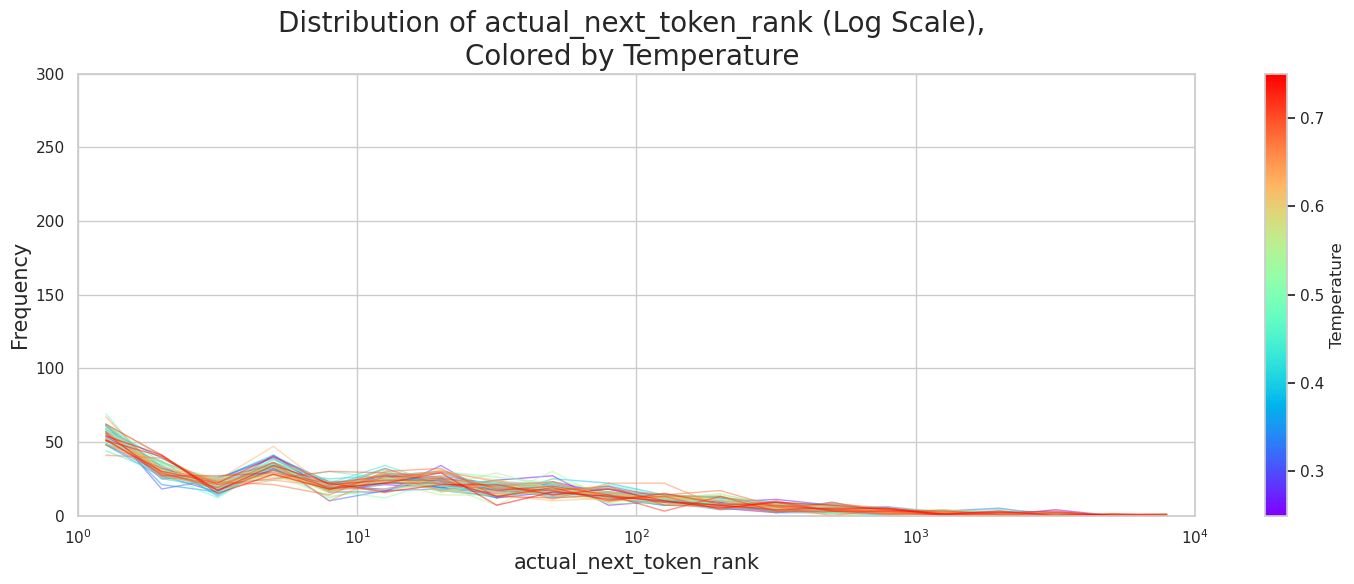

In [141]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 6))

# Normalize the temperature for color mapping
norm = plt.Normalize(gptdf['temperature'].min(), gptdf['temperature'].max())
sm = plt.cm.ScalarMappable(cmap="rainbow", norm=norm)
sm.set_array([])
# set bins for histogram
bins = np.logspace(np.log10(1), np.log10(10000), 21)

# Plot each row's perplexity array with temperature as hue
for i, row in gptdf.iterrows():
    rank_array = row['next_token_rank']
    temperature = row['temperature']
    #ax.plot(perplexity_array, color=sm.to_rgba(temperature), label=f'Temp: {temperature:.2f}', alpha=0.8, linewidth=0.5)

    filtered_data = rank_array

    # Plot histogram with log-spaced bins and set x-axis to log scale
    # ax.hist(filtered_data, bins=bins, color='green', alpha=0.7)
    counts, _ = np.histogram(filtered_data, bins=bins)
    ax.set_xscale('log')  # Set log scale after plotting
    # Calculate the middle of each bin in log scale
    bin_middles = np.sqrt(bins[1:] * bins[:-1])
    # Create a line plot
    sns.lineplot(x=bin_middles, y=counts, ax=ax, color=sm.to_rgba(temperature), alpha=0.5, linewidth=1)

# Add color bar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Temperature')

# Set x,y axis scale and limits
ax.set_ylim(0, 300)
ax.set_xlim(1, 10000)
ax.set_xscale('log')  # Set log scale after plotting

# Add title and labels
ax.set_title('Distribution of actual_next_token_rank (Log Scale), \nColored by Temperature ', fontsize=20)
ax.set_xlabel('actual_next_token_rank', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)


plt.tight_layout()
plt.show()


See if the same phenomenon is true for the human sessions. 

In [143]:
corpusdf = pd.read_pickle('./data/elect_evaldf.pkl')
if sample_size is not None:
    corpusdf = corpusdf.iloc[:sample_size]
corpusdf.shape

(10, 33)

In [ ]:
import pandas as pd
import glob
import numpy as np
import os

# Get the list of the first 10 JSON files
json_files = glob.glob('./data/elect_stats_llama2/*.json')

# Read each JSON file into a dataframe and concatenate them
df_list = [pd.read_json(file, orient='records', lines=True) for file in json_files]


In [145]:
if sample_size is not None:
    df_list = df_list[:sample_size]
# Combine the dataframes into a single dataframe
combined_df = pd.DataFrame([df.to_dict(orient='list') for df in df_list])

In [146]:
stat_cols = ['logit_mean', 'logit_std',
    'prob_mean', 'prob_std', 'log_prob_mean', 'log_prob_std',
    'actual_next_token_logit', 'actual_next_token_prob',
    'actual_next_token_log_prob_z_score', 'actual_next_token_prob_z_score',
    'actual_next_token_logit_z_score', 'actual_next_token_rank',
    'perplexity']
for col in stat_cols:
    combined_df[col] = [np.array(x) for x in combined_df[col]]

In [147]:
corpusdf = corpusdf.join(combined_df)

In [ ]:
corpusdf.to_pickle('./data/elect_evaldf_llama2_withstats.pkl')

In [150]:
# Get the Set1 colormap
set1_colors = sns.color_palette("Set2")

# Switch the first two colors
custom_palette = set1_colors.copy()
custom_palette[0], custom_palette[1] = custom_palette[1], custom_palette[0]


In [151]:
big_palette = sns.color_palette("Set1").copy() + sns.color_palette("Set2").copy() + sns.color_palette("Set3").copy()

human_list = ['persuade_corpus', 'train_essays']
# Top tier models for text generation
ai_top_list = [
    'radekgpt4', 'nima_gpt4', 'chat_gpt_moth',
    'darragh_claude_v7', 'llama_falcon_v3_falcon_180b',
    'llama_70b_v1', 'llama2_chat', 'falcon_180b_v1', 
    'mistral7binstruct_v2', 'mistralai/Mistral-7B-Instruct-v0.1', 'llama_70b_v1', 'Mistral7B_CME_v7']
source_list = human_list + ai_top_list
color_dict = dict(zip(source_list, big_palette[:len(source_list)]))

In [152]:
corpusdf['source'].value_counts()

source
Mistral7B_CME_v7    10
Name: count, dtype: int64

In [153]:
row['index']

KeyError: 'index'

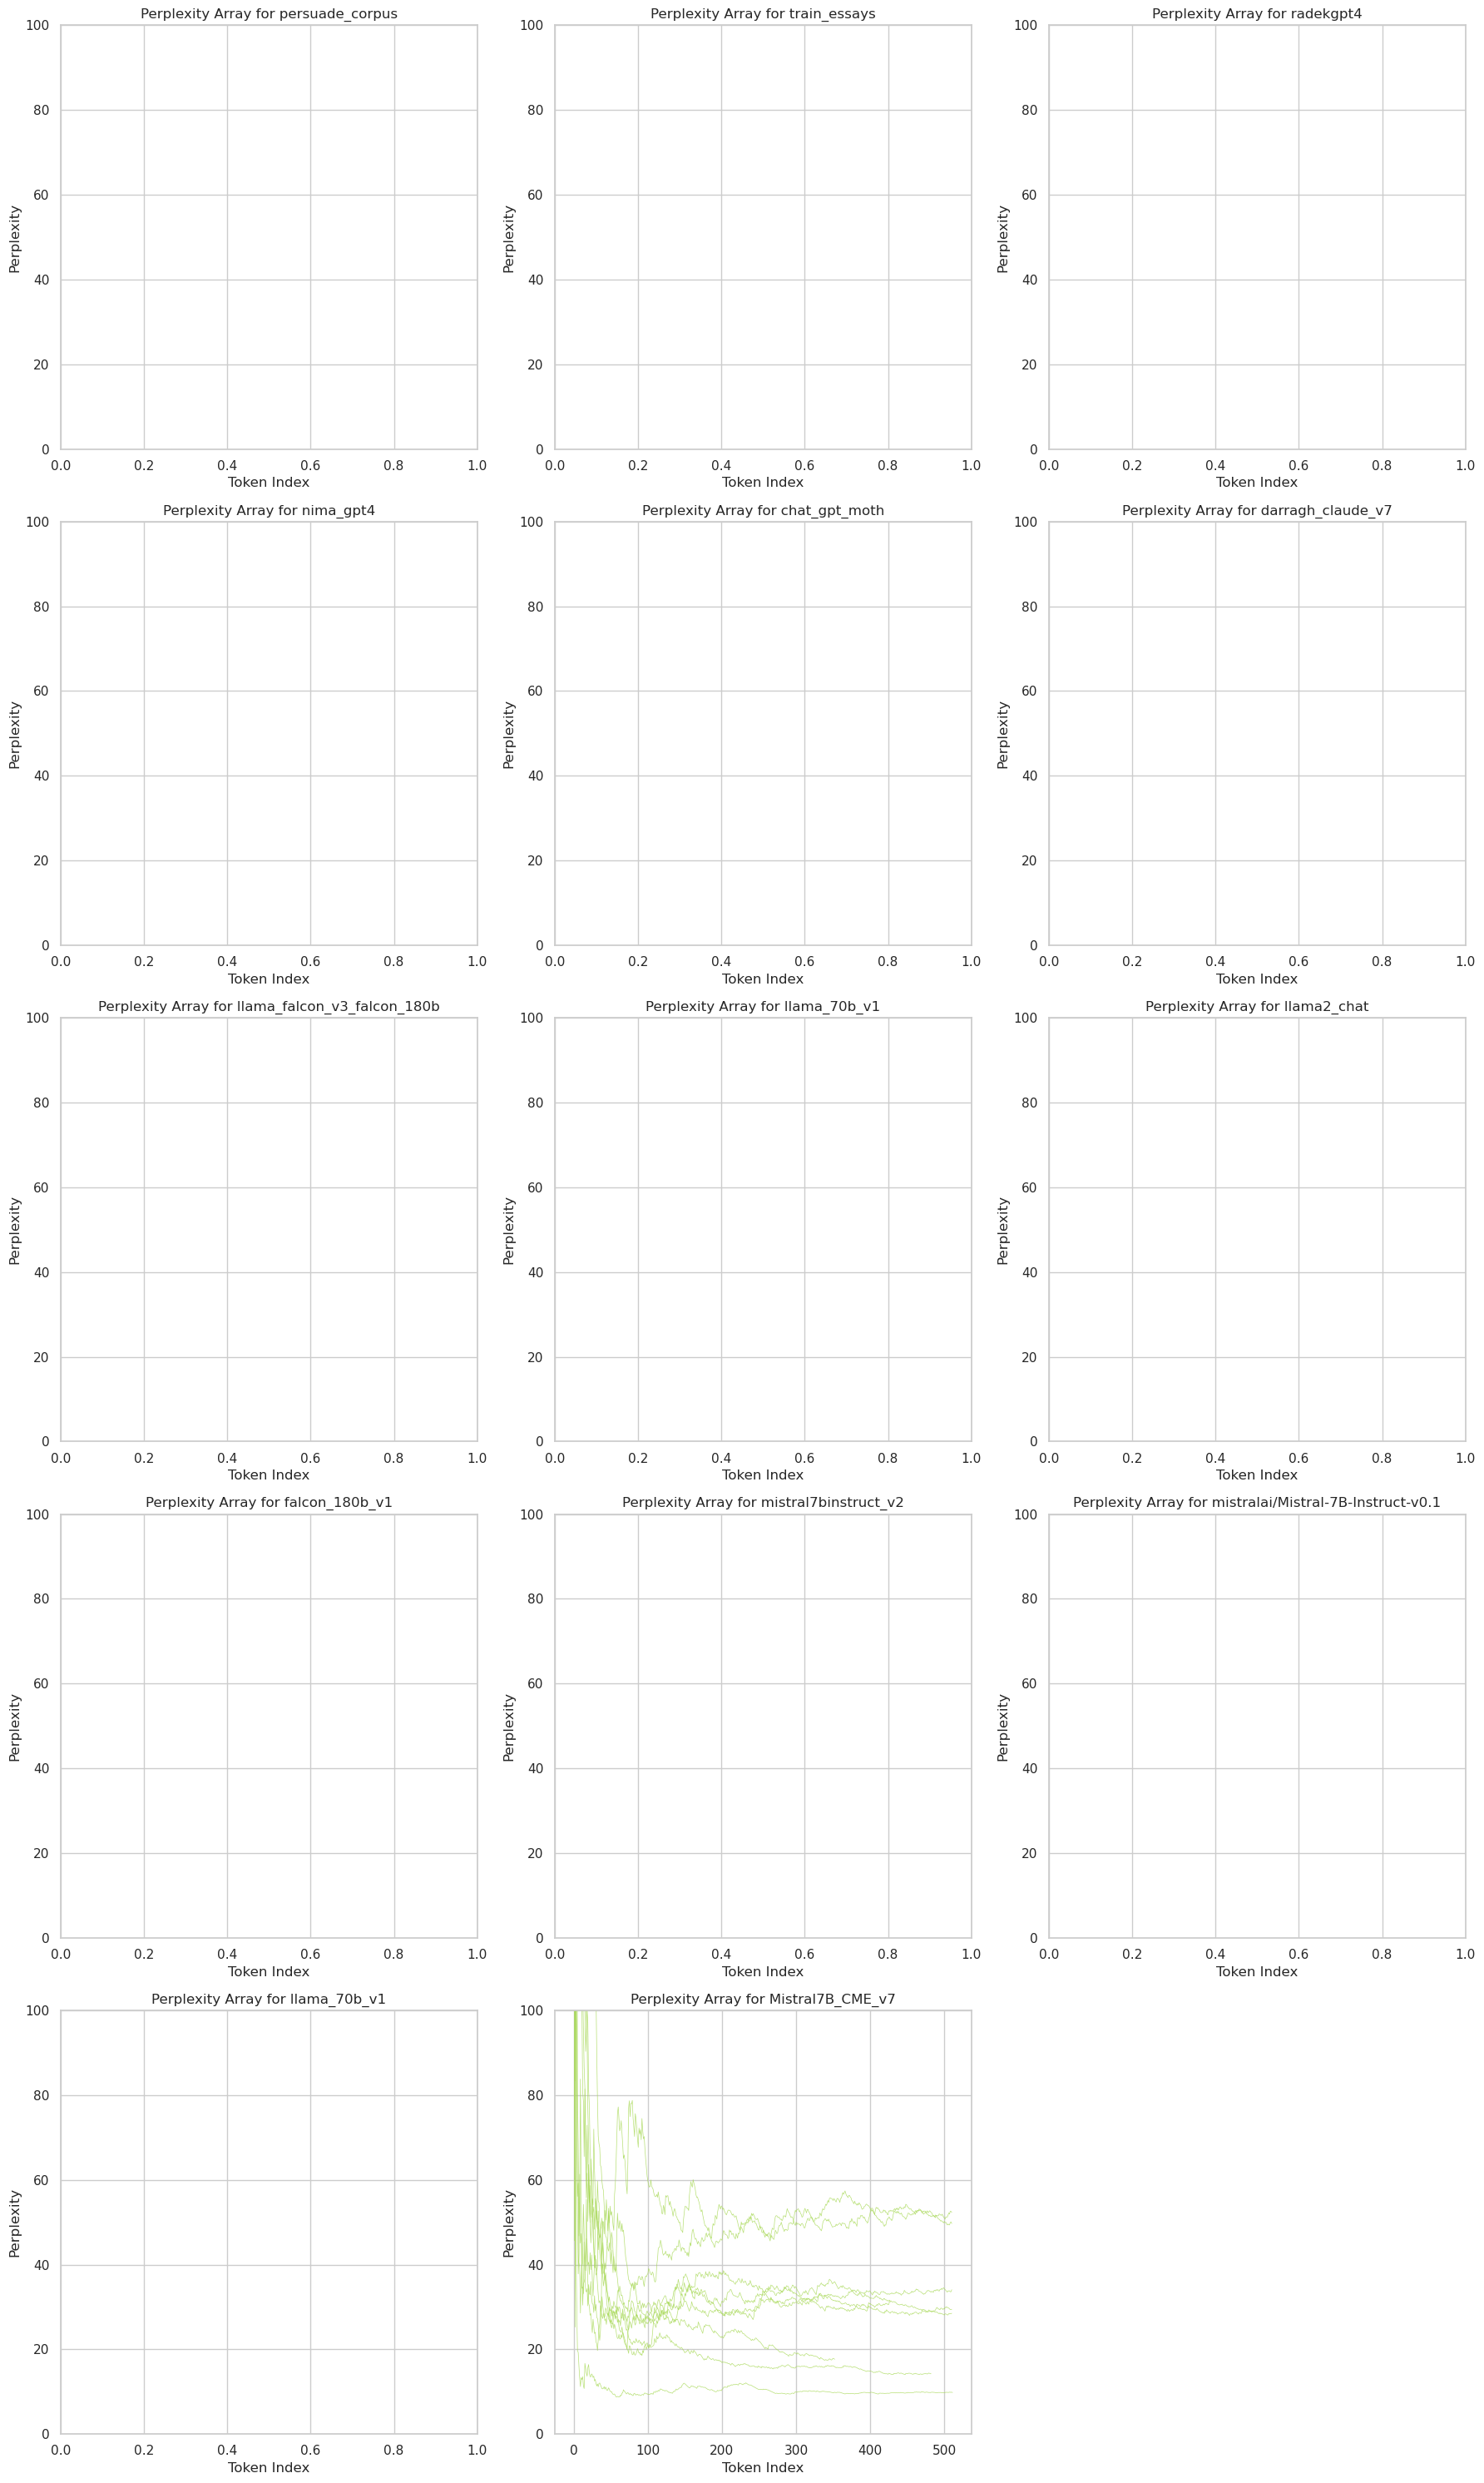

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style="whitegrid")

# Get unique sources
unique_sources = source_list

# Calculate the number of rows needed
num_rows = (len(unique_sources) + 2) // 3

# Create a figure and axis
fig, axs = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Plot each row's perplexity array with source as hue
for i, source in enumerate(unique_sources):
    ax = axs[i]
    for _, row in corpusdf[corpusdf['source'] == source].iterrows():
        perplexity_array = row['perplexity']
        ax.plot(perplexity_array, color=color_dict[source], label=source, alpha=0.8, linewidth=0.5)
    ax.set_title(f'Perplexity Array for {source}')
    ax.set_ylim(0, 100)
    ax.set_xlabel('Token Index')
    ax.set_ylabel('Perplexity')

# Remove any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


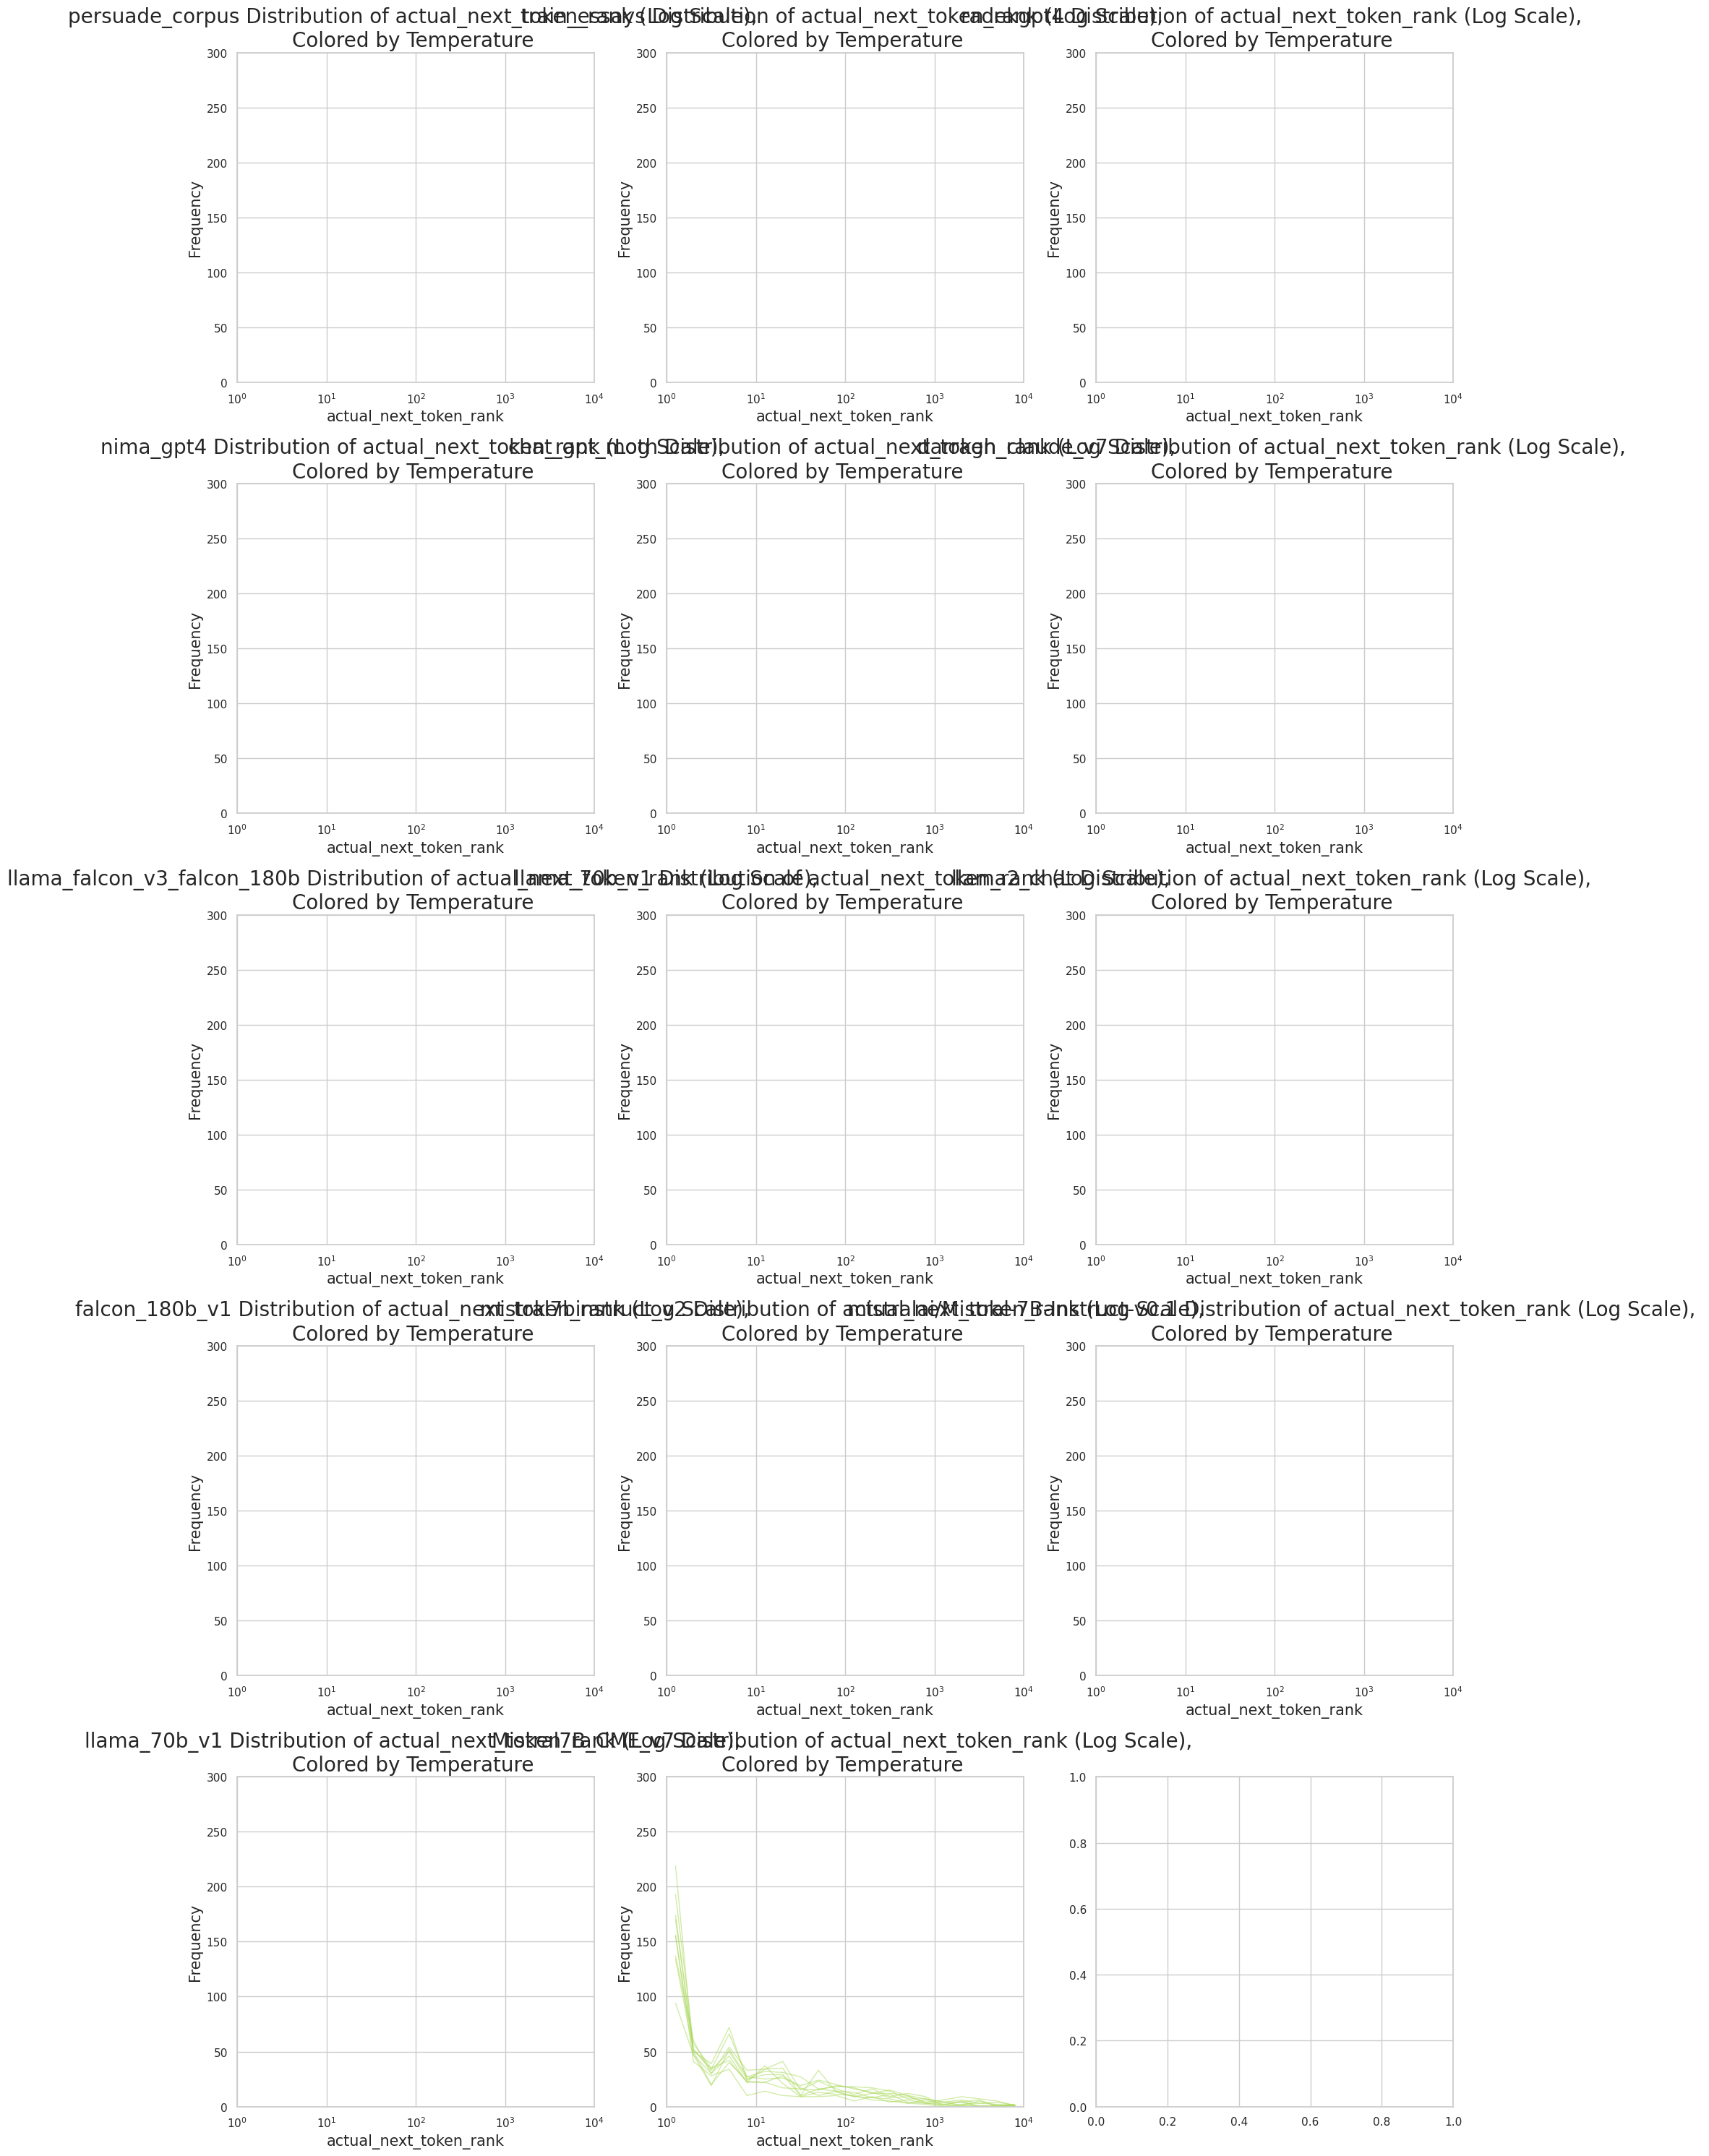

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style="whitegrid")

# Get unique sources
unique_sources = source_list

# Calculate the number of rows needed
num_rows = (len(unique_sources) + 2) // 3

# Create a figure and axis
fig, axs = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Plot each row's perplexity array with source as hue
for i, source in enumerate(unique_sources):
    ax = axs[i]
    for _, row in corpusdf[corpusdf['source'] == source].iterrows():
        rank_array = row['actual_next_token_rank']
        
        filtered_data = rank_array

        # Plot histogram with log-spaced bins and set x-axis to log scale
        # ax.hist(filtered_data, bins=bins, color='green', alpha=0.7)
        counts, _ = np.histogram(filtered_data, bins=bins)
        ax.set_xscale('log')  # Set log scale after plotting
        # Calculate the middle of each bin in log scale
        bin_middles = np.sqrt(bins[1:] * bins[:-1])
        # Create a line plot
        sns.lineplot(x=bin_middles, y=counts, ax=ax, color=color_dict[source], alpha=0.5, linewidth=1)

    # Set x,y axis scale and limits
    ax.set_ylim(0, 300)
    ax.set_xlim(1, 10000)
    ax.set_xscale('log')  # Set log scale after plotting

    # Add title and labels
    ax.set_title(f'{source} Distribution of actual_next_token_rank (Log Scale), \nColored by Temperature ', fontsize=20)
    ax.set_xlabel('actual_next_token_rank', fontsize=15)
    ax.set_ylabel('Frequency', fontsize=15)

plt.tight_layout()
plt.show()

